In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

# Analysis the Results from Former Calculation for <u>_Arial Part_</u> vs. Current Resutls for <u>_Chr 1_</u>

## Read the files, apply filters

In [2]:
path_bed = "/shares/grossniklaus.botinst.uzh/eharputluoglu/meta_methylome/results/shannon/div_CHG_Col-0_wt_aerial-part.bed.gz"

bed = pd.read_csv(path_bed, sep = "\t", low_memory = False)
new_arial = pd.read_csv("/home/eharpu/shannon/output_results_5_6.csv", sep = "\t")

# Filter for Chr 1
bed_1 = bed[bed["#chrom"] == "1"]

# Create a set of unique (start, end) tuples from bed_1
unique_start_end = set(zip(bed_1["start"], bed_1["end"]))

# Filter new_arial for rows where (start, end) is in the unique_start_end set
arial_filtered = new_arial[new_arial.apply(lambda x: (x['start'], x['end']) in unique_start_end, axis=1)]

"""
# filter for start and end coordination
start_arr = bed_1["start"].unique()
end_arr = bed_1["end"].unique()
arial_filtered = new_arial[new_arial["start"].isin(start_arr) & new_arial["end"].isin(end_arr)]
"""

# Reset index for alignment with bed_1 if necessary
arial_filtered = arial_filtered.reset_index(drop=True)  # drop=True to avoid adding the old index as a column
bed_1 = bed_1.reset_index(drop=True)

# rename col names to match
arial_filtered = arial_filtered.rename(columns={"M": "5mC", "UN": "C"}, errors="raise")


## Scatter Plots

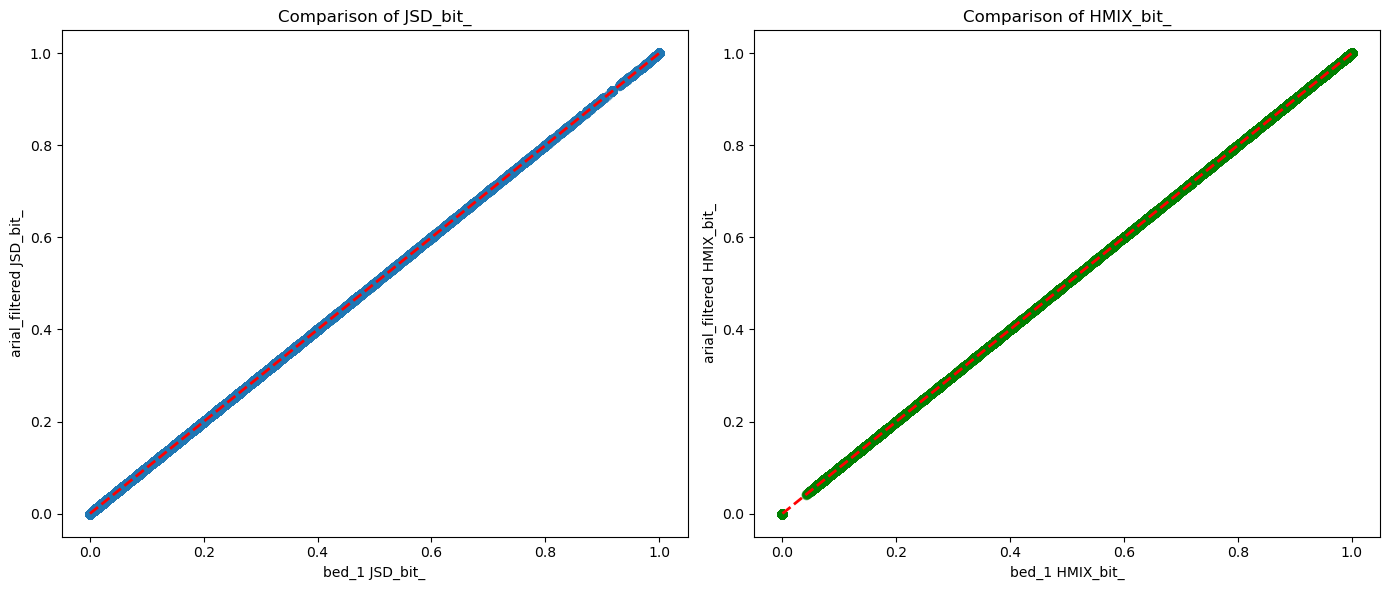

In [9]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Scatter plot for JSD_bit_
axes[0].scatter(bed_1['JSD_bit_'], arial_filtered['JSD_bit_'], alpha=0.5)
axes[0].set_title('Comparison of JSD_bit_')
axes[0].set_xlabel('bed_1 JSD_bit_')
axes[0].set_ylabel('arial_filtered JSD_bit_')

# Adding a line of y=x to indicate perfect agreement
axes[0].plot([bed_1['JSD_bit_'].min(), bed_1['JSD_bit_'].max()], 
             [bed_1['JSD_bit_'].min(), bed_1['JSD_bit_'].max()], 
             'r--', lw=2)

# Scatter plot for HMIX_bit_
axes[1].scatter(bed_1['HMIX_bit_'], arial_filtered['HMIX_bit_'], alpha=0.5, color='green')
axes[1].set_title('Comparison of HMIX_bit_')
axes[1].set_xlabel('bed_1 HMIX_bit_')
axes[1].set_ylabel('arial_filtered HMIX_bit_')

# Adding a line of y=x to indicate perfect agreement
axes[1].plot([bed_1['HMIX_bit_'].min(), bed_1['HMIX_bit_'].max()], 
             [bed_1['HMIX_bit_'].min(), bed_1['HMIX_bit_'].max()], 
             'r--', lw=2)

plt.tight_layout()
plt.show()


## Hexbin

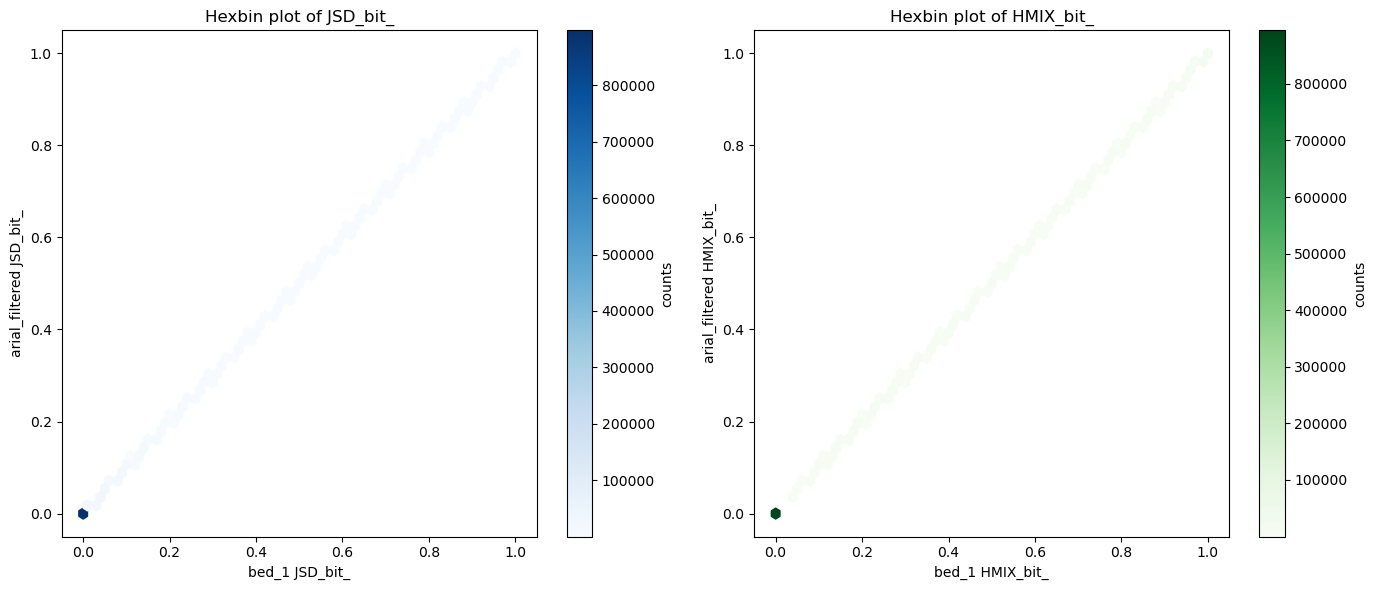

In [10]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Hexbin plot for JSD_bit_
hb1 = axes[0].hexbin(bed_1['JSD_bit_'], arial_filtered['JSD_bit_'], gridsize=50, cmap='Blues', mincnt=1)
axes[0].set_title('Hexbin plot of JSD_bit_')
axes[0].set_xlabel('bed_1 JSD_bit_')
axes[0].set_ylabel('arial_filtered JSD_bit_')
cb1 = fig.colorbar(hb1, ax=axes[0])
cb1.set_label('counts')

# Hexbin plot for HMIX_bit_
hb2 = axes[1].hexbin(bed_1['HMIX_bit_'], arial_filtered['HMIX_bit_'], gridsize=50, cmap='Greens', mincnt=1)
axes[1].set_title('Hexbin plot of HMIX_bit_')
axes[1].set_xlabel('bed_1 HMIX_bit_')
axes[1].set_ylabel('arial_filtered HMIX_bit_')
cb2 = fig.colorbar(hb2, ax=axes[1])
cb2.set_label('counts')

# Show the plot
plt.tight_layout()
plt.show()


## Correlation of JSD and MIX Entropy & Density PLot

- Pearson correlation coefficient
- subset sampling to process it faster : 50.000 and 5.000 samples

```python
# Pearson correlation coefficient 
correlation_jsd = np.corrcoef(bed_1['JSD_bit_'], arial_filtered['JSD_bit_'])[0, 1]
correlation_hmix = np.corrcoef(bed_1['HMIX_bit_'], arial_filtered['HMIX_bit_'])[0, 1]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Calculate the point density for JSD_bit_
x_jsd = bed_1['JSD_bit_']
y_jsd = arial_filtered['JSD_bit_']
xy_jsd = np.vstack([x_jsd,y_jsd])
z_jsd = gaussian_kde(xy_jsd)(xy_jsd)

# Contour plot for JSD_bit_
axes[0].scatter(x_jsd, y_jsd, c=z_jsd, s=100, edgecolor='')
axes[0].set_title(f'2D Density plot of JSD_bit_ (corr: {correlation_jsd:.2f})')
axes[0].set_xlabel('bed_1 JSD_bit_')
axes[0].set_ylabel('arial_filtered JSD_bit_')

# Calculate the point density for HMIX_bit_
x_hmix = bed_1['HMIX_bit_']
y_hmix = arial_filtered['HMIX_bit_']
xy_hmix = np.vstack([x_hmix,y_hmix])
z_hmix = gaussian_kde(xy_hmix)(xy_hmix)

# Contour plot for HMIX_bit_
axes[1].scatter(x_hmix, y_hmix, c=z_hmix, s=100, edgecolor='')
axes[1].set_title(f'2D Density plot of HMIX_bit_ (corr: {correlation_hmix:.2f})')
axes[1].set_xlabel('bed_1 HMIX_bit_')
axes[1].set_ylabel('arial_filtered HMIX_bit_')

# Set aspect of the subplots to be equal for better comparison
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()




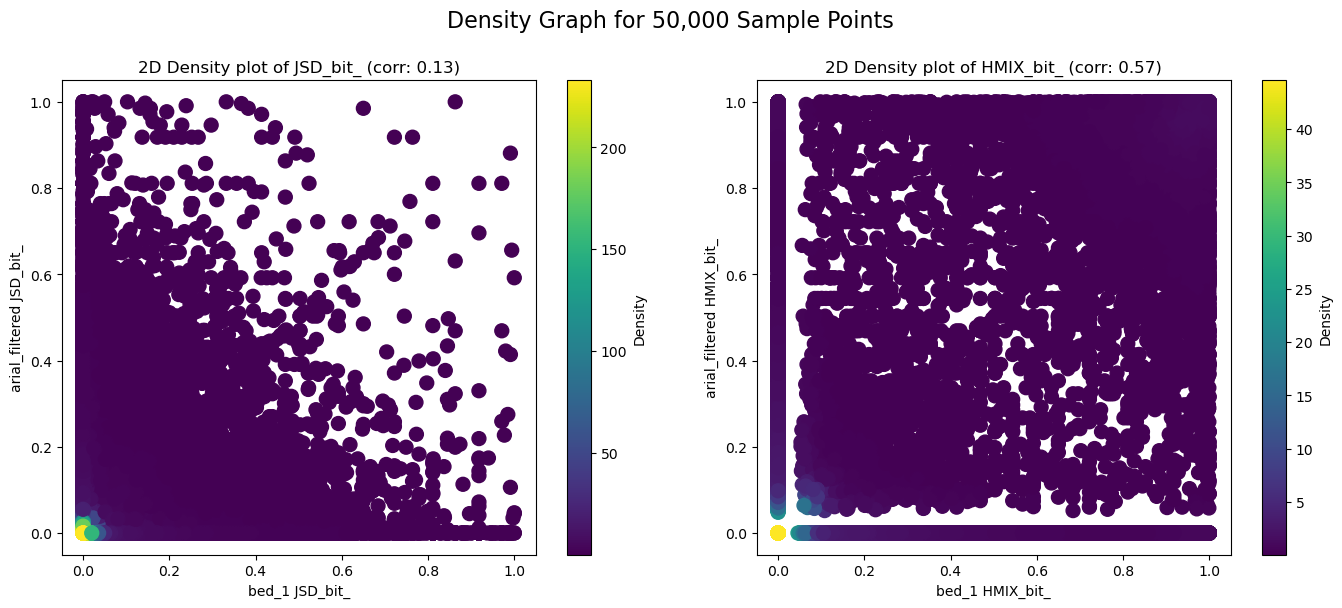

In [5]:
# Sample a subset of the data for faster processing
sample_size = 50000  
bed_1_sample = bed_1.sample(n=sample_size, random_state=1)
arial_filtered_sample = arial_filtered.sample(n=sample_size, random_state=1)

# Pearson correlation coefficient for the sample
correlation_jsd = np.corrcoef(bed_1_sample['JSD_bit_'], arial_filtered_sample['JSD_bit_'])[0, 1]
correlation_hmix = np.corrcoef(bed_1_sample['HMIX_bit_'], arial_filtered_sample['HMIX_bit_'])[0, 1]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Calculate the point density for JSD_bit_
x_jsd = bed_1_sample['JSD_bit_']
y_jsd = arial_filtered_sample['JSD_bit_']
xy_jsd = np.vstack([x_jsd, y_jsd])
z_jsd = gaussian_kde(xy_jsd)(xy_jsd)

# Contour plot for JSD_bit_
scatter_jsd = axes[0].scatter(x_jsd, y_jsd, c=z_jsd, s=100, cmap='viridis')
axes[0].set_title(f'2D Density plot of JSD_bit_ (corr: {correlation_jsd:.2f})')
axes[0].set_xlabel('bed_1 JSD_bit_')
axes[0].set_ylabel('arial_filtered JSD_bit_')
cb_jsd = fig.colorbar(scatter_jsd, ax=axes[0])
cb_jsd.set_label('Density')

# Calculate the point density for HMIX_bit_
x_hmix = bed_1_sample['HMIX_bit_']
y_hmix = arial_filtered_sample['HMIX_bit_']
xy_hmix = np.vstack([x_hmix, y_hmix])
z_hmix = gaussian_kde(xy_hmix)(xy_hmix)

# Contour plot for HMIX_bit_
scatter_hmix = axes[1].scatter(x_hmix, y_hmix, c=z_hmix, s=100, cmap='viridis')
axes[1].set_title(f'2D Density plot of HMIX_bit_ (corr: {correlation_hmix:.2f})')
axes[1].set_xlabel('bed_1 HMIX_bit_')
axes[1].set_ylabel('arial_filtered HMIX_bit_')
cb_hmix = fig.colorbar(scatter_hmix, ax=axes[1])
cb_hmix.set_label('Density')

fig.suptitle('Density Graph for 50,000 Sample Points', fontsize=16)

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


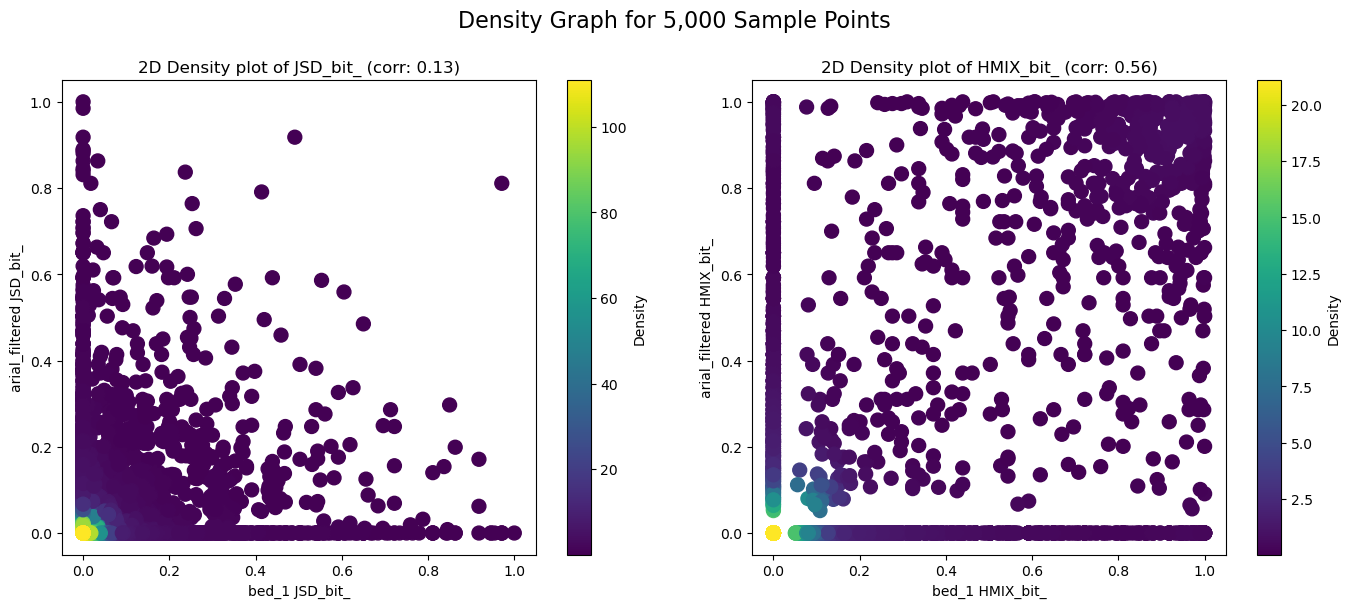

In [6]:
# Sample a subset of the data for faster processing
sample_size = 5000  
bed_1_sample = bed_1.sample(n=sample_size, random_state=1)
arial_filtered_sample = arial_filtered.sample(n=sample_size, random_state=1)

# Pearson correlation coefficient for the sample
correlation_jsd = np.corrcoef(bed_1_sample['JSD_bit_'], arial_filtered_sample['JSD_bit_'])[0, 1]
correlation_hmix = np.corrcoef(bed_1_sample['HMIX_bit_'], arial_filtered_sample['HMIX_bit_'])[0, 1]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Calculate the point density for JSD_bit_
x_jsd = bed_1_sample['JSD_bit_']
y_jsd = arial_filtered_sample['JSD_bit_']
xy_jsd = np.vstack([x_jsd, y_jsd])
z_jsd = gaussian_kde(xy_jsd)(xy_jsd)

# Contour plot for JSD_bit_
scatter_jsd = axes[0].scatter(x_jsd, y_jsd, c=z_jsd, s=100, cmap='viridis')
axes[0].set_title(f'2D Density plot of JSD_bit_ (corr: {correlation_jsd:.2f})')
axes[0].set_xlabel('bed_1 JSD_bit_')
axes[0].set_ylabel('arial_filtered JSD_bit_')
cb_jsd = fig.colorbar(scatter_jsd, ax=axes[0])
cb_jsd.set_label('Density')

# Calculate the point density for HMIX_bit_
x_hmix = bed_1_sample['HMIX_bit_']
y_hmix = arial_filtered_sample['HMIX_bit_']
xy_hmix = np.vstack([x_hmix, y_hmix])
z_hmix = gaussian_kde(xy_hmix)(xy_hmix)

# Contour plot for HMIX_bit_
scatter_hmix = axes[1].scatter(x_hmix, y_hmix, c=z_hmix, s=100, cmap='viridis')
axes[1].set_title(f'2D Density plot of HMIX_bit_ (corr: {correlation_hmix:.2f})')
axes[1].set_xlabel('bed_1 HMIX_bit_')
axes[1].set_ylabel('arial_filtered HMIX_bit_')
cb_hmix = fig.colorbar(scatter_hmix, ax=axes[1])
cb_hmix.set_label('Density')

fig.suptitle('Density Graph for 5,000 Sample Points', fontsize=16)

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


In [ ]:
# Pearson correlation coefficient 
correlation_jsd = np.corrcoef(bed_1['JSD_bit_'], arial_filtered['JSD_bit_'])[0, 1]
correlation_hmix = np.corrcoef(bed_1['HMIX_bit_'], arial_filtered['HMIX_bit_'])[0, 1]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Calculate the point density for JSD_bit_
x_jsd = bed_1['JSD_bit_']
y_jsd = arial_filtered['JSD_bit_']
xy_jsd = np.vstack([x_jsd,y_jsd])
z_jsd = gaussian_kde(xy_jsd)(xy_jsd)

# Contour plot for JSD_bit_
axes[0].scatter(x_jsd, y_jsd, c=z_jsd, s=100, edgecolor='')
axes[0].set_title(f'2D Density plot of JSD_bit_ (corr: {correlation_jsd:.2f})')
axes[0].set_xlabel('bed_1 JSD_bit_')
axes[0].set_ylabel('arial_filtered JSD_bit_')

# Calculate the point density for HMIX_bit_
x_hmix = bed_1['HMIX_bit_']
y_hmix = arial_filtered['HMIX_bit_']
xy_hmix = np.vstack([x_hmix,y_hmix])
z_hmix = gaussian_kde(xy_hmix)(xy_hmix)

# Contour plot for HMIX_bit_
axes[1].scatter(x_hmix, y_hmix, c=z_hmix, s=100, edgecolor='')
axes[1].set_title(f'2D Density plot of HMIX_bit_ (corr: {correlation_hmix:.2f})')
axes[1].set_xlabel('bed_1 HMIX_bit_')
axes[1].set_ylabel('arial_filtered HMIX_bit_')

# Set aspect of the subplots to be equal for better comparison
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()




#### Sorted Set for each start-end combination

In [2]:
path_bed = "/shares/grossniklaus.botinst.uzh/eharputluoglu/meta_methylome/results/shannon/div_CHG_Col-0_wt_aerial-part.bed.gz"

bed = pd.read_csv(path_bed, sep="\t", low_memory=False)
new_arial = pd.read_csv("/home/eharpu/shannon/output_results_5_6.csv", sep="\t")

# Filter for Chr 1
bed_1 = bed[bed["#chrom"] == "1"]

# Create a set of unique (start, end) tuples from bed_1
unique_start_end = set(zip(bed_1["start"], bed_1["end"]))

# Filter new_arial for rows where (start, end) is in the unique_start_end set
arial_filtered = new_arial[new_arial.apply(lambda x: (x['start'], x['end']) in unique_start_end, axis=1)]

# Sort arial_filtered by the 'start' column
arial_filtered = arial_filtered.sort_values(by='start')

# Reset index for alignment after sorting
arial_filtered = arial_filtered.reset_index(drop=True)
bed_1 = bed_1.reset_index(drop=True)

# Rename column names to match
arial_filtered = arial_filtered.rename(columns={"M": "5mC", "UN": "C"}, errors="raise")

# Optionally, check if all combinations from bed_1 are present in arial_filtered
missing_pairs = unique_start_end - set(zip(arial_filtered["start"], arial_filtered["end"]))
if missing_pairs:
    print("Missing (start, end) pairs in arial_filtered:", missing_pairs)
else:
    print("All (start, end) pairs from bed_1 are present in arial_filtered.")

All (start, end) pairs from bed_1 are present in arial_filtered.


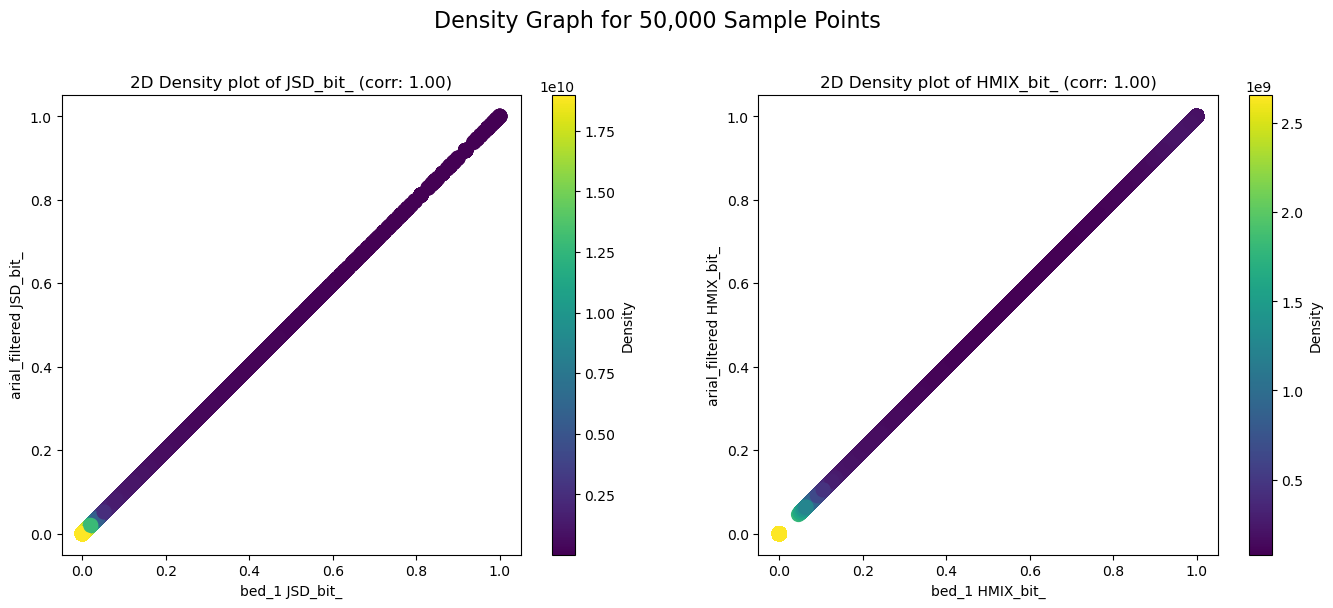

In [8]:
# Sample a subset of the data for faster processing
sample_size = 50000 
bed_1_sample = bed_1.sample(n=sample_size, random_state=1)
arial_filtered_sample = arial_filtered.sample(n=sample_size, random_state=1)

# Pearson correlation coefficient for the sample
correlation_jsd = np.corrcoef(bed_1_sample['JSD_bit_'], arial_filtered_sample['JSD_bit_'])[0, 1]
correlation_hmix = np.corrcoef(bed_1_sample['HMIX_bit_'], arial_filtered_sample['HMIX_bit_'])[0, 1]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Calculate the point density for JSD_bit_
x_jsd = bed_1_sample['JSD_bit_']
y_jsd = arial_filtered_sample['JSD_bit_']
xy_jsd = np.vstack([x_jsd, y_jsd])
z_jsd = gaussian_kde(xy_jsd)(xy_jsd)

# Contour plot for JSD_bit_
scatter_jsd = axes[0].scatter(x_jsd, y_jsd, c=z_jsd, s=100, cmap='viridis')
axes[0].set_title(f'2D Density plot of JSD_bit_ (corr: {correlation_jsd:.2f})')
axes[0].set_xlabel('bed_1 JSD_bit_')
axes[0].set_ylabel('arial_filtered JSD_bit_')
cb_jsd = fig.colorbar(scatter_jsd, ax=axes[0])
cb_jsd.set_label('Density')

# Calculate the point density for HMIX_bit_
x_hmix = bed_1_sample['HMIX_bit_']
y_hmix = arial_filtered_sample['HMIX_bit_']
xy_hmix = np.vstack([x_hmix, y_hmix])
z_hmix = gaussian_kde(xy_hmix)(xy_hmix)

# Contour plot for HMIX_bit_
scatter_hmix = axes[1].scatter(x_hmix, y_hmix, c=z_hmix, s=100, cmap='viridis')
axes[1].set_title(f'2D Density plot of HMIX_bit_ (corr: {correlation_hmix:.2f})')
axes[1].set_xlabel('bed_1 HMIX_bit_')
axes[1].set_ylabel('arial_filtered HMIX_bit_')
cb_hmix = fig.colorbar(scatter_hmix, ax=axes[1])
cb_hmix.set_label('Density')

fig.suptitle('Density Graph for 50,000 Sample Points', fontsize=16)

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


In [11]:
bed_1.compare(arial_filtered)

#chrom       sample size      
          self other        self other
0            1     1         7.0   8.0
1            1     1         7.0   8.0
2            1     1         7.0   8.0
3            1     1         6.0   8.0
4            1     1         7.0   8.0
...        ...   ...         ...   ...
1256934      1     1         5.0   8.0
1256935      1     1         7.0   8.0
1256936      1     1         4.0   8.0
1256937      1     1         7.0   8.0
1256938      1     1         6.0   8.0

[1256939 rows x 4 columns]